In [1]:
import os

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  PROJECT_ROOT ="/content/drive/MyDrive/GitHub/CNN-FaceNet-Face-Recognition"
  os.chdir(PROJECT_ROOT)
  !pwd
else:
  PROJECT_ROOT ="."

Running on CoLab
/content/drive/MyDrive/GitHub/CNN-FaceNet-Face-Recognition


In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
import dlib
import cv2

In [4]:
from google.colab.patches import cv2_imshow
import numpy as np

In [5]:
import imutils

In [6]:
# Load the model
from tensorflow.keras.models import model_from_json
json_file = open('keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('keras-facenet-h5/model.h5')
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [7]:
def embed_img(img,model):
  # scale pixel values
	img = img.astype('float32')
	mean, std = img.mean(), img.std()
	img = (img - mean) / std
	# transform face into one sample
	samples = np.expand_dims(img, axis=0)
	# make prediction to get embedding
	y_predicted = model.predict(samples)
	return y_predicted

In [8]:
model1_path = 'pretrained-models-downloaded/mmod_human_face_detector.dat'
cnn_face_detector = dlib.cnn_face_detection_model_v1(model1_path)

RuntimeError: ignored

In [6]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.rect.left()
    y = rect.rect.top()
    w = rect.rect.right() - x
    h = rect.rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [29]:
# Extract the faces from an image
def extract_faces(image_path):

  # Read the image
  image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED) 
  # Resize the image if it's large
  #if image.shape[0] > 600 and image.shape[1] > 600:
    #image = cv2.resize(image, (600,600), interpolation = cv2.INTER_AREA)
  image = imutils.resize(image, height=480) 
  # Convert the image to gray-scales
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  #cv2_imshow(image_gray)

  # Detect the faces in rectangles with cnn_face_detector
  rects = cnn_face_detector(image_gray, 2)

  dim = (160, 160)
  faces=[]
  # If no face is detected in the image, we will add a NaN
  if(len(rects)==0):
    nan_images_data = np.empty(dim + (3,))
    nan_images_data[:] = np.nan
    faces.append(nan_images_data)
    return faces

  # Otherwise, loop over all the rectangles to gets separate faces
  for (i, rect) in enumerate(rects):
    # Convert the bounding box to edges
    (x, y, w, h) = rect_to_bb(rect)

    # Copy and crop the face out of the image
    image_copy = image.copy()
    if(x>=0 and y>=0 and w>=0 and h>=0):
        image_cropped = image_copy[y:y+h, x:x+w]
    else:
        image_cropped = image_copy.copy()
      
    # Resize the face to the correct size
    face = cv2.resize(image_cropped, dim, interpolation = cv2.INTER_AREA)
   
   # Keep track of all faces
    faces.append(face)
  return np.array(faces)


1
(160, 160, 3)


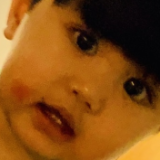

In [ ]:
# Get faces detected from the image
img_path = '/content/drive/MyDrive/GitHub/CNN-FaceNet-Face-Recognition/images_tested/jerry_livingroom2.jpeg'
face_rects = extract_faces(img_path)
print(len(face_rects))

for face in face_rects:
  print(face.shape)
  cv2_imshow(face)

In [ ]:
dict_imgs = {}
find_regex = re.compile(r"^[^.]*")   # get all character before "." in string
img_orig_path ='images_orig'
for img_name in os.listdir(img_orig_path):
  img_path = img_orig_path + "/" + img_name
  face_rect = extract_faces(img_path)[0]   # assume there is ONLY ONE face
  img_name_short = re.search(find_regex, img_name).group(0)
  dict_imgs[img_name_short] = face_rect
dict_imgs


In [ ]:
np.save('dict_img_training.npy',  dict_imgs)  

In [ ]:
dict_imgs = np.load('dict_img_training.npy',allow_pickle=True)
dict_imgs

In [28]:
dict_imgs_embedded ={}
for key in dict_imgs.item().keys():
  img_arr = np.array(dict_imgs[()][key])
  img_arr = np.reshape(img_arr,(160,160,3))
  img_arr_embedded = embed_img(img_arr,model)
  dict_imgs_embedded[key] = img_arr_embedded

dict_imgs_embedded["jerry"]

array([[ 0.00872554, -0.1856761 ,  0.79698515, -0.47372204,  0.3987144 ,
         0.78739953, -0.16956285,  0.0240937 , -0.54421675,  0.8026355 ,
         0.1763295 ,  0.7426128 ,  0.35963452,  0.22191116,  0.40243942,
         0.62226874,  0.19545805,  0.18883356, -0.1932303 ,  0.3650407 ,
        -0.36996028,  0.09464807, -0.7552924 ,  0.02480739,  0.12609042,
         0.03005976, -0.2259722 ,  0.44907165,  0.5126922 ,  0.63766974,
         0.47650528, -0.38836426, -0.15653698, -0.7358786 ,  0.5080799 ,
        -0.97970396, -0.44447282,  0.62927574, -0.47691244,  0.64329517,
         0.5824195 , -0.33420596,  0.17882353,  0.5185741 , -0.51512027,
        -0.97842854,  0.27284715,  0.59996915,  0.31649297,  0.13431428,
        -0.1828257 ,  0.4499228 ,  0.8524699 , -0.43668434,  0.8899148 ,
        -1.0540105 ,  0.6487213 ,  0.47773945, -0.21541478, -0.6267284 ,
         0.10439446, -0.12650934,  0.19735412,  1.2341136 , -0.470089  ,
         0.3948248 , -0.41573453, -0.0981238 ,  1.0

In [34]:
dict_imgs_embedded.keys()
for name in dict_imgs_embedded:
  print(name)

sebastiano
dan
benoit
arnaud
bertrand
tian
andrew
kevin
kian
felix
younes
danielle
jerry
daniel


In [35]:
def who_is_it(img_path, database, model,dist_thres=1.0):
    """ Implements face recognition for the office by finding who is the person on the image_path image.
    """
    face_rect = extract_faces(img_path)[0] 
    encoding =  embed_img(img_arr,model)
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary.
    for name in database:
        # Compute L2 distance between the target "encoding" and the current db_enc from the database. (≈ 1 line)
        dist = np.linalg.norm(encoding-database[name])
        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist<min_dist:
            min_dist = dist
            identity = name
    
    if min_dist > dist_thres:
        print("Not in the database.")
    else:
        print (f"It's {str(identity)} & the distance is {str(min_dist)}.")
        
    return min_dist, identity

In [39]:
img_path='/content/drive/MyDrive/GitHub/CNN-FaceNet-Face-Recognition/images_tested/camera_0.jpg'
who_is_it(img_path,dict_imgs_embedded,model)

NameError: ignored